In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models


In [3]:
(X_train, Y_train),(X_test, Y_test) = datasets.mnist.load_data()
print("Training set shape: ", X_train.shape)
print("Test set shape: ", X_test.shape)

Training set shape:  (60000, 28, 28)
Test set shape:  (10000, 28, 28)


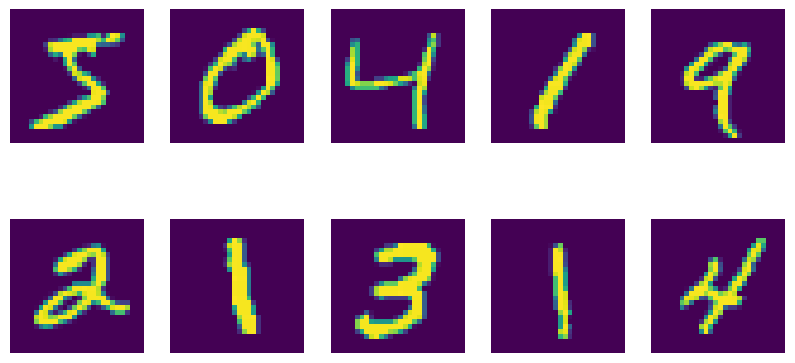

In [4]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu', input_shape =(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8964 - loss: 0.3264 - val_accuracy: 0.9835 - val_loss: 0.0514
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9844 - loss: 0.0483 - val_accuracy: 0.9902 - val_loss: 0.0306
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9900 - loss: 0.0323 - val_accuracy: 0.9909 - val_loss: 0.0278
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9923 - loss: 0.0227 - val_accuracy: 0.9906 - val_loss: 0.0302
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9942 - loss: 0.0183 - val_accuracy: 0.9901 - val_loss: 0.0350
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9952 - loss: 0.0150 - val_accuracy: 0.9913 - val_loss: 0.0314
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9966 - loss: 0.0115 - val_accuracy: 0.9897 - val_loss: 0.0354
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9967 - loss: 0

In [11]:
loss, accuracy = model.evaluate(X_test, Y_test) 
print(f"Test accuracy: {accuracy * 100:.2f}%") 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9889 - loss: 0.0494
Test accuracy: 99.19%


In [12]:
predictions = model.predict(X_test) 
predicted_labels = np.argmax(predictions, axis=1) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


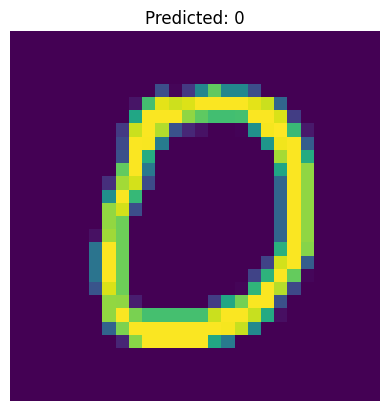

In [14]:
index = 10

plt.imshow(X_test[index]) 
plt.title(f"Predicted: {predicted_labels[index]}") 
plt.axis('off') 
plt.show() 